In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = 'd3327d21e28dc765c979ebf6bbc75878'

C:\Users\beall\AppData\Local\Temp\ipykernel_22536\496243854.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# create FRED object 

fred = Fred(api_key=fred_key)

In [3]:
# search for econ data

sp_search = fred.search('S&P', order_by='popularity')

sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-04-02   2024-04-02   
CSUSHPINSA          CSUSHPINSA     2024-04-02   2024-04-02   
SP500                    SP500     2024-04-02   2024-04-02   
MEHOINUSA672N    MEHOINUSA672N     2024-04-02   2024-04-02   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-04-02   2024-04-02   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-03-31  Daily, Close   
CSUSHPINSA            1987-01-01      2024-01-01       Monthly   
SP500                 2014-04-02      2024-04-01  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2024-03-31  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2024-04-01 09:26:14-05:00   
CSUSHPINSA                           NSA  2024-03-26 08:11:02-05:00   
SP500                                NSA  2024-04-01 19:11:05-05:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   
BAMLH0A0HYM2EY                       NSA  2024-04-01 09:26:18-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           92  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          83  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...

In [4]:
# pull raw data

sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

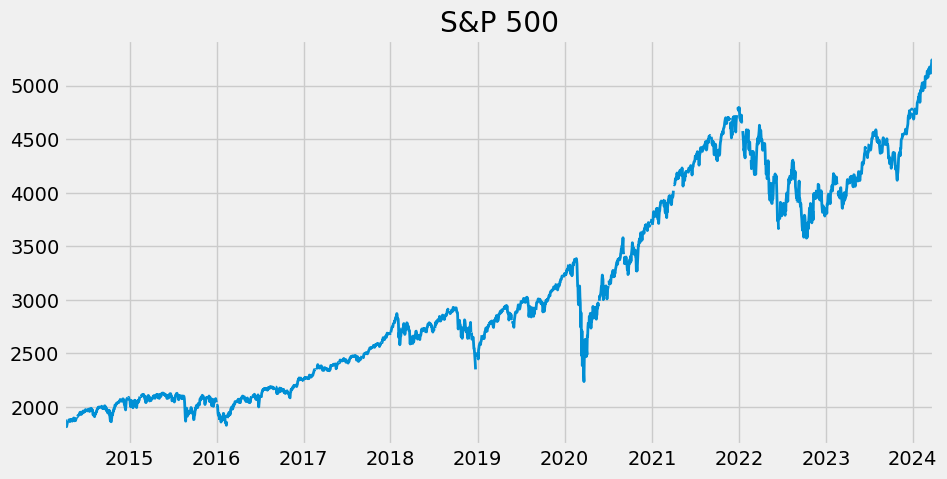

In [5]:
# plot

sp500.plot(figsize=(10,5),title='S&P 500', lw=2)

In [6]:
# pull and join series

unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [7]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [8]:
cols_to_drop = []
for i in uemp_results:
    if len(i) != 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [9]:
uemp_states = uemp_results.dropna()
uemp_states

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ILUR  \
1976-01-01   9.2   5.8  10.3   9.7   8.0   8.1   9.9   6.6  10.5   6.4   6.6   
1976-02-01   9.2   5.8  10.3   9.7   8.1   8.1   9.9   6.6  10.5   6.4   6.6   
1976-03-01   9.1   5.9  10.2   9.6   8.1   8.1   9.9   6.6  10.5   6.4   6.6   
1976-04-01   9.1   5.9  10.2   9.5   8.1   8.0   9.8   6.5  10.3   6.3   6.6   
1976-05-01   9.0   5.9  10.1   9.3   8.1   7.8   9.6   6.4  10.1   6.1   6.6   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-10-01   5.1   3.9   4.6   3.1   3.4   3.6   4.2   2.8   3.4   3.6   4.8   
2023-11-01   5.1   3.9   4.6   3.1   3.4   3.6   4.1   2.8   3.3   3.6   4.7   
2023-12-01   5.1   3.9   4.6   3.1   3.4   3.6   4.1   2.8   3.2   3.6   4.7   
2024-01-01   5.2   3.9   4.5   3.1   3.4   3.7   4.0   2.9   3.0   3.5   4.7   
2024-02-01   5.3   3.9   4.4   3.1   3.4   3.7   3.9   3.0   2.9   3.5   4.8   

            NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  MNUR  TNUR  \
1976-01-01  10.3   8.4   5.8  10.2   5.8   6.1   5.6   7.4   8.6   6.0   6.0   
1976-02-01  10.3   8.4   5.7  10.2   5.8   6.1   5.6   7.4   8.7   6.0   6.0   
1976-03-01  10.3   8.4   5.7  10.1   5.7   6.1   5.6   7.3   8.7   5.9   6.0   
1976-04-01  10.3   8.3   5.6  10.0   5.6   6.0   5.6   7.2   8.6   5.8   6.0   
1976-05-01  10.3   8.1   5.6   9.8   5.5   5.9   5.5   7.0   8.6   5.7   5.9   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-10-01   4.8   3.2   3.3   4.2   3.4   3.0   4.3   3.0   4.0   2.8   3.5   
2023-11-01   4.8   3.2   3.3   4.2   3.4   3.1   4.3   3.0   4.0   2.7   3.5   
2023-12-01   4.8   3.2   3.3   4.2   3.4   3.0   4.3   3.0   4.0   2.7   3.4   
2024-01-01   4.8   3.1   3.4   4.2   3.2   3.0   4.3   3.0   4.0   2.7   3.5   
2024-02-01   4.8   3.1   3.5   4.1   3.0   3.0   4.4   3.1   3.9   2.7   3.3   

            WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  AKUR  IAUR  UTUR  \
1976-01-01   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   4.3   5.8   
1976-02-01   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   4.3   5.9   
1976-03-01   8.4   6.4   9.4   7.5   9.2   7.3   5.8   5.9   7.0   4.3   5.8   
1976-04-01   8.5   6.4   9.2   7.5   9.0   7.2   5.8   6.0   6.9   4.2   5.8   
1976-05-01   8.5   6.5   9.1   7.4   8.9   7.1   5.7   6.0   6.9   4.1   5.7   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-10-01   4.4   2.3   4.0   4.3   5.3   3.7   3.5   3.3   4.6   3.1   2.8   
2023-11-01   4.4   2.2   4.0   4.3   5.3   3.7   3.5   3.3   4.6   3.1   2.8   
2023-12-01   4.4   2.2   4.0   4.3   5.3   3.7   3.5   3.3   4.6   3.0   2.8   
2024-01-01   4.6   2.3   4.1   4.3   5.3   3.7   3.5   3.3   4.6   3.0   2.8   
2024-02-01   4.7   2.4   4.2   4.3   5.2   3.6   3.6   3.3   4.7   2.9   2.8   

            PRUR  INUR  LAUR  HIUR  NDUR  MTUR  DCUR  MSUR  MEUR  NEUR  CTUR  \
1976-01-01  19.6   6.6   6.3   9.8   3.4   5.8   8.7   6.7   8.7   3.3   9.8   
1976-02-01  19.5   6.6   6.3   9.8   3.4   5.8   8.7   6.7   8.7   3.3   9.8   
1976-03-01  19.3   6.5   6.3   9.8   3.4   5.8   8.6   6.6   8.6   3.3   9.8   
1976-04-01  19.0   6.3   6.4   9.7   3.5   5.8   8.5   6.4   8.6   3.2   9.6   
1976-05-01  18.9   6.0   6.5   9.4   3.6   5.8   8.4   6.3   8.5   3.1   9.4   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-10-01   5.6   3.5   4.0   3.0   1.9   3.3   4.9   3.2   3.4   2.5   4.2   
2023-11-01   5.6   3.5   4.0   3.0   1.9   3.3   4.9   3.2   3.4   2.5   4.2   
2023-12-01   5.7   3.5   4.0   3.0   1.9   3.3   4.9   3.2   3.4   2.5   4.2   
2024-01-01   5.7   3.5   4.1   3.1   1.9   3.3   5.0   3.2   3.4   2.5   4.4   
2024-02-01   5.7   3.5   4.2   3.1   2.0   3.4   5.1   3.1   3.4   2.5   4.5   

            IDUR  NHUR  RIUR  KSUR  WYUR  DEUR  VTUR  SDUR  
1976-01-01   5.6   6.5   7.8   4.2   4.1   8.0   8.6   3.3  
1976-02-01   5.6   6.5   7.8   4.2   4.1   8.0

In [10]:
px.line(uemp_states)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=CAUR<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'CAUR',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'CAUR',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 12, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2024, 2, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9.2, 9.2, 9.1, ..., 5.1, 5.2, 5.3]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=TXUR<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'TXUR',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'TXUR',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 12, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2024, 2, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([5.8, 5.8, 5.9, ..., 3.9, 3.9, 3.9]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=NYUR<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'NYUR',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'NYUR',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 12, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2024, 2, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([10.3, 10.3, 10.2, ...,  4.6,  4.5,  4.4]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=FLUR<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'FLUR',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'FLUR',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 12, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2024, 2, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9.7, 9.7, 9.6, ..., 3.1, 3.1, 3.1]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=PAUR<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'PAUR',
              'line': {'color': '#FFA15A', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'PAUR',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                 

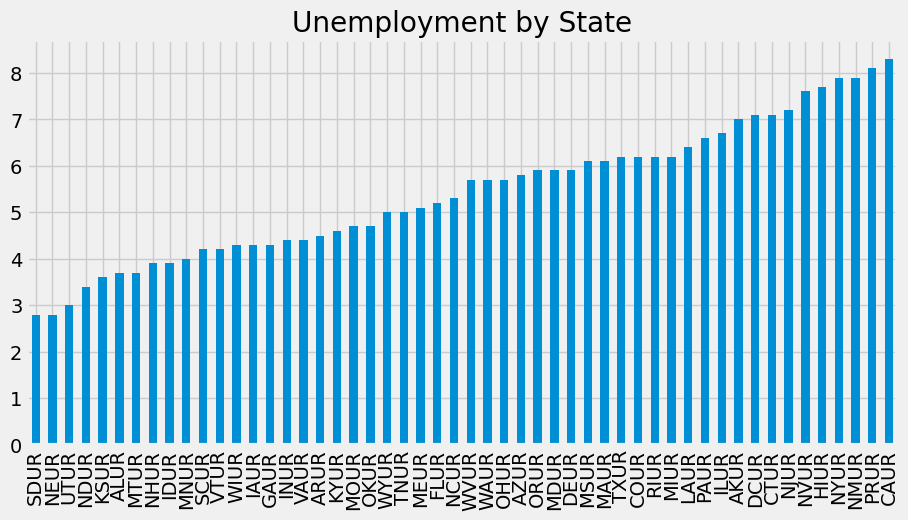

In [11]:
# pull apr 2020 per state

ax = uemp_states.loc[uemp_states.index == '2021-04-01'].T \
    .sort_values('2021-04-01') \
    .plot(kind='bar', figsize=(10,5), title='Unemployment by State')

ax.legend().remove()

In [15]:
id_to_state = uemp_states['title'].str.replace('Unemployment Rate in ', '').to_dict()
id_to_state

KeyError: 'title'

In [16]:
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

uemp_states

NameError: name 'id_to_state' is not defined

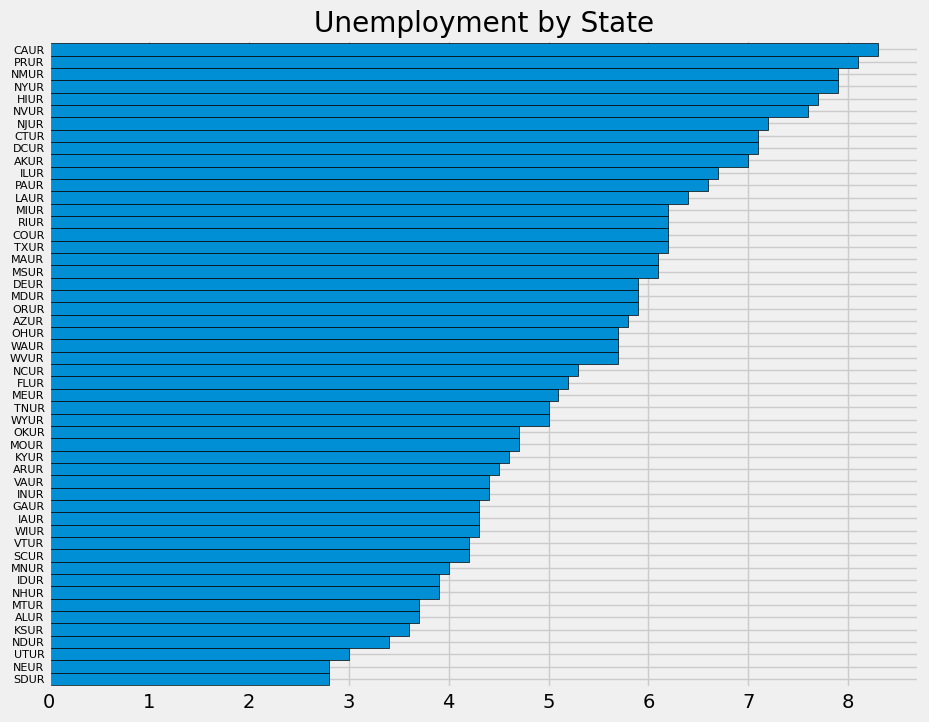

In [17]:
# pull apr 2020 per state

ax = uemp_states.loc[uemp_states.index == '2021-04-01'].T \
    .sort_values('2021-04-01') \
    .plot(kind='barh', figsize=(10,8), width=1, edgecolor='black', title='Unemployment by State')

ax.legend().remove()
ax.tick_params(axis='y', labelsize=8)

In [18]:
px.line(uemp_states)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=CAUR<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'CAUR',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'CAUR',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 12, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2024, 2, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9.2, 9.2, 9.1, ..., 5.1, 5.2, 5.3]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=TXUR<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'TXUR',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'TXUR',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 12, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2024, 2, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([5.8, 5.8, 5.9, ..., 3.9, 3.9, 3.9]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=NYUR<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'NYUR',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'NYUR',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 12, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2024, 2, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([10.3, 10.3, 10.2, ...,  4.6,  4.5,  4.4]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=FLUR<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'FLUR',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'FLUR',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 12, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2024, 2, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9.7, 9.7, 9.6, ..., 3.1, 3.1, 3.1]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=PAUR<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'PAUR',
              'line': {'color': '#FFA15A', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'PAUR',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                 

In [22]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [23]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

KeyError: 'California'

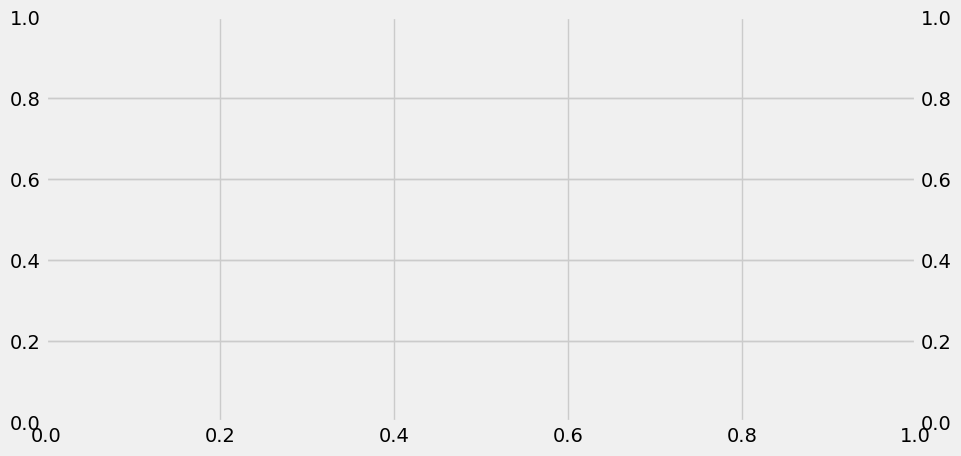

In [24]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()